<a href="https://colab.research.google.com/github/DhruvG17/Census_Adult_Salary/blob/main/Census_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the main libraries

In [78]:
import pandas as pd
import numpy as np

## Load in data

In [79]:
df = pd.read_csv('Adult_Census_Income.csv')

## Data Preprocessing

In [80]:
df.head(10) # view the first 10 items in the dataframe

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [81]:
print(df.isnull().sum()) # check if there are any null values in the data frame

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [82]:
df['income'] = df['income'].apply(lambda x: x.replace('<50K', '0').replace('<=50K', '0').replace('>50K', '1').replace('=>50K', '1')) # make the income column a 0 and 1 classification column
df['sex'] = df['sex'].apply(lambda x: x.replace('Female', '1').replace('Male', '0')) # simplify the sex column 

df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,1,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,0,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,1,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,1,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,0,0,3004,60,?,1


In [83]:
df['income'] = df['income'].astype(int) # change income to an integer 
df['sex'] = df['sex'].astype(int)
print(df.dtypes) # look at the data types of each column
print(df.shape) # look at the shape of the data frame

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex                int64
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object
(32561, 15)


In [84]:
df_num = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'sex', 'income'] # list of categorical numeric values

df_cat = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country'] # list of categorical values 

In [85]:
# let's look for outliers
from scipy import stats

z_scores = np.abs(stats.zscore(df[df_num]))
print(np.where(z_scores > 3)) # we can use the threshold of 3 to find our z scores for our numeric data

(array([    0,     0,     1, ..., 32528, 32528, 32534]), array([0, 4, 0, ..., 0, 5, 5]))


In [86]:
df_2 = df[(z_scores < 3).all(axis=1)] # remove the rows with outliers (z score >= 3) in them 
df_2.shape # check the shape of the new dataframe without the outliers 

(29828, 15)

##Data Visulization

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation between numeric values')

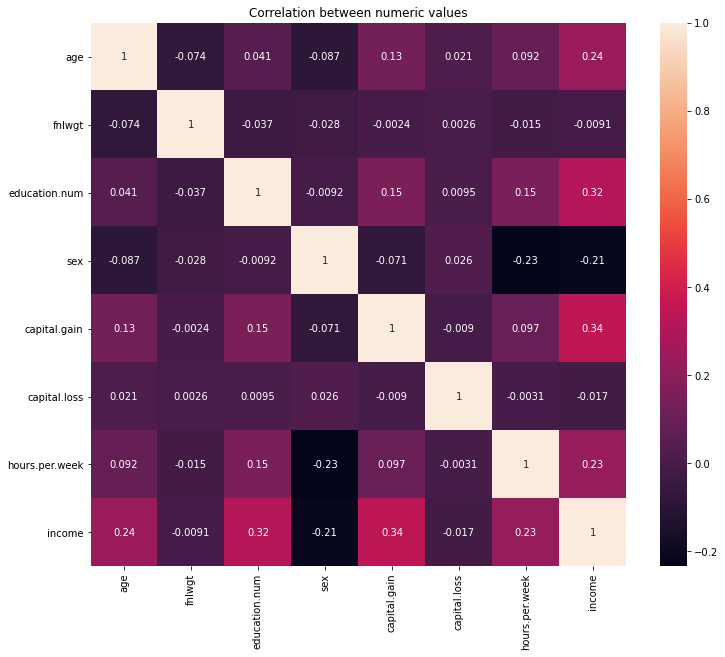

In [88]:
df_2_corr = df_2.corr('pearson')

heatmap = sns.heatmap(df_2_corr, annot=True)
heatmap.figure.set_size_inches(12,10)
heatmap.set_title('Correlation between numeric values')

In [89]:
print('Occupation Unique Counts:','\n', df_2['occupation'].value_counts().sort_values(ascending=False)) # good variation in the data

Occupation Unique Counts: 
 Craft-repair         3793
Prof-specialty       3669
Exec-managerial      3619
Adm-clerical         3581
Sales                3352
Other-service        3086
Machine-op-inspct    1873
?                    1661
Transport-moving     1462
Handlers-cleaners    1287
Tech-support          856
Farming-fishing       855
Protective-serv       598
Priv-house-serv       128
Armed-Forces            8
Name: occupation, dtype: int64


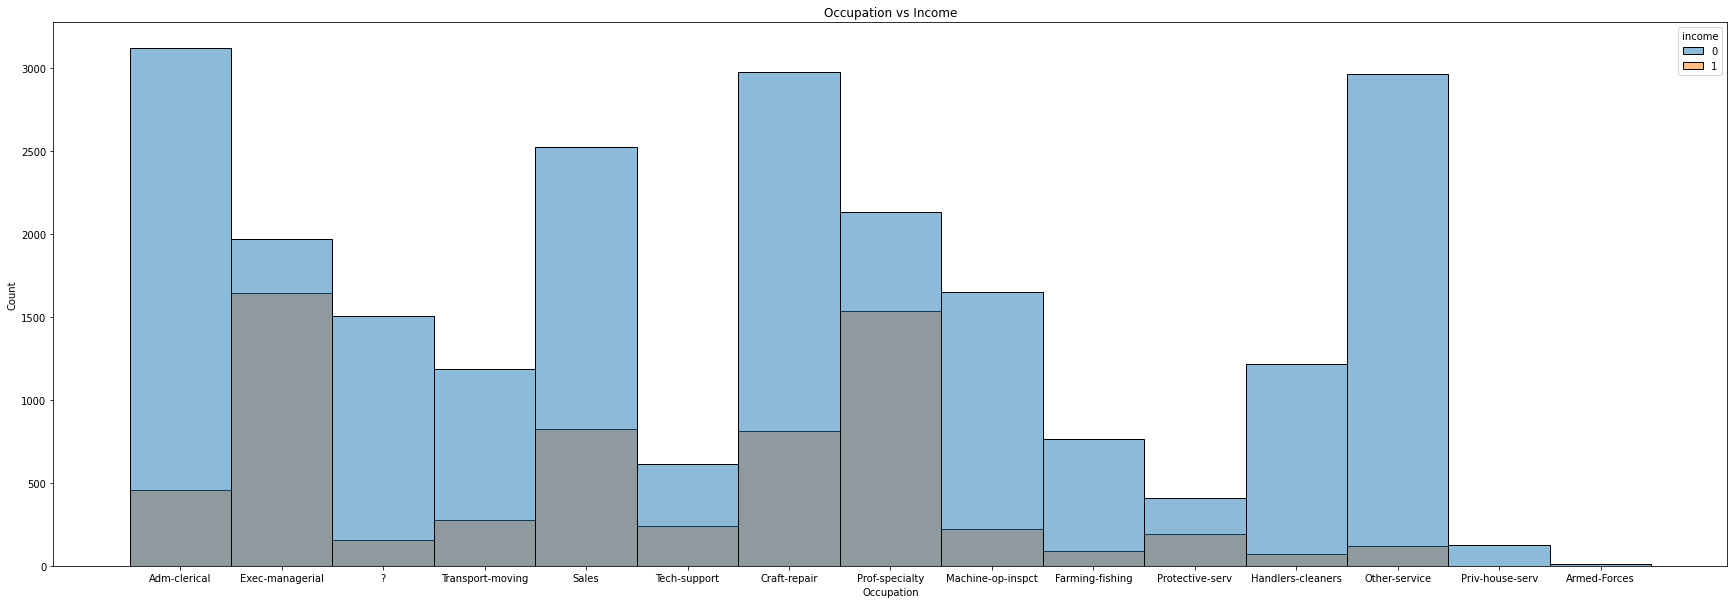

In [90]:
occ_income = sns.histplot(x='occupation', hue = 'income', data = df_2) 
occ_income.set_xlabel('Occupation')
occ_income.set_title('Occupation vs Income')
occ_income.figure.set_size_inches(30,10)

In [91]:
print('Workclass Unique Values', '\n', df_2['workclass'].value_counts().sort_values(ascending=False)) # we can see that the majority of unique values in the workclass column are for 'Private' and then spread out evenly between the rest

Workclass Unique Values 
 Private             20985
Self-emp-not-inc     2213
Local-gov            1915
?                    1654
State-gov            1217
Self-emp-inc          938
Federal-gov           885
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


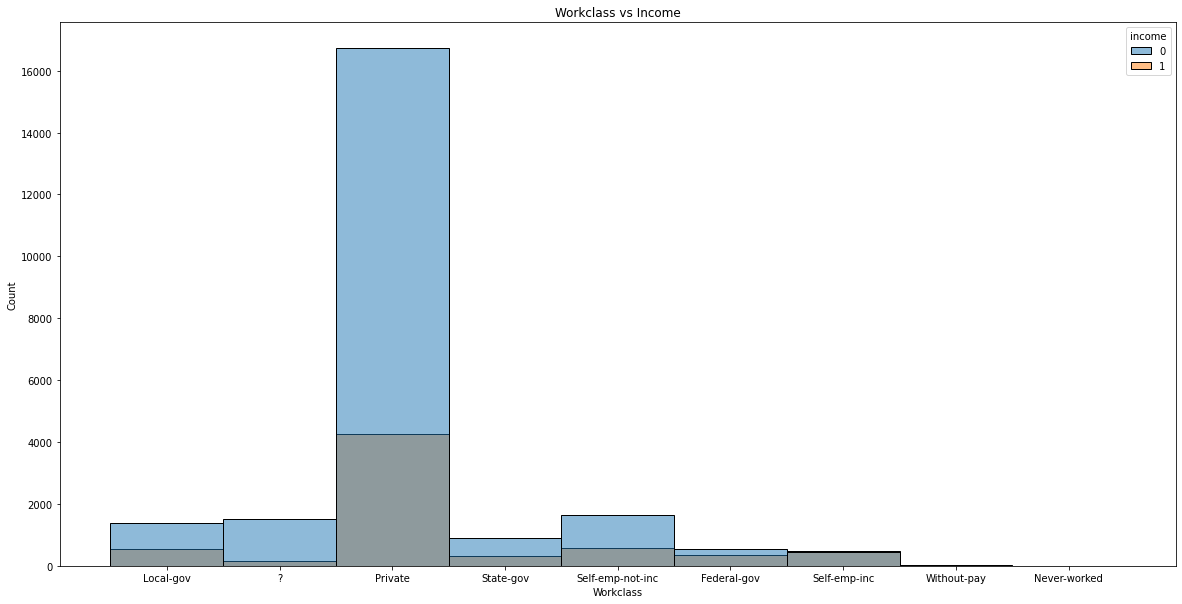

In [92]:
wkclass_income = sns.histplot(x='workclass', hue = 'income', data = df_2) 
wkclass_income.set_xlabel('Workclass')
wkclass_income.set_title('Workclass vs Income')
wkclass_income.figure.set_size_inches(20,10)

In [93]:
print('Relationship Unique Counts:','\n', df_2['relationship'].value_counts().sort_values(ascending=False)) 
print('')
print('Marital Status Unique Counts:', '\n', df_2['marital.status'].value_counts().sort_values(ascending=False)) # This seems to be better distributed than Relationship
print('')
print('Race Unique Counts:', '\n', df_2['race'].value_counts().sort_values(ascending=False)) # not worth putting in our models since there is not much variance

Relationship Unique Counts: 
 Husband           11761
Not-in-family      7636
Own-child          4826
Unmarried          3271
Wife               1421
Other-relative      913
Name: relationship, dtype: int64

Marital Status Unique Counts: 
 Married-civ-spouse       13382
Never-married            10059
Divorced                  4158
Separated                  957
Widowed                    880
Married-spouse-absent      373
Married-AF-spouse           19
Name: marital.status, dtype: int64

Race Unique Counts: 
 White                 25473
Black                  2871
Asian-Pac-Islander      942
Amer-Indian-Eskimo      295
Other                   247
Name: race, dtype: int64


Text(0.5, 0, 'Marital Status')

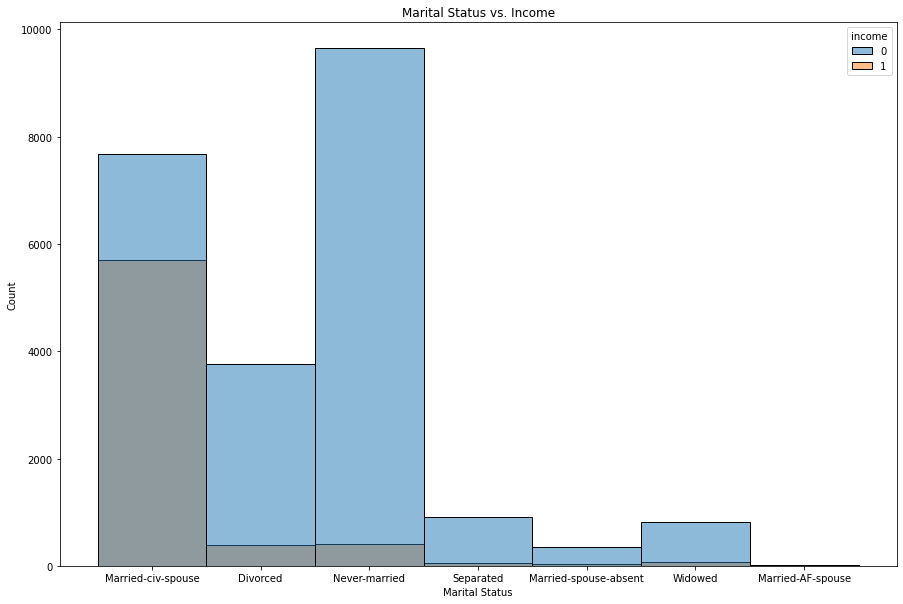

In [94]:
hist1 = sns.histplot(data=df_2, x='marital.status', hue='income')
hist1.figure.set_size_inches(15,10)
hist1.set_title('Marital Status vs. Income')
hist1.set_xlabel('Marital Status')

In [95]:
print('Education Unique Counts:','\n', df_2['education'].value_counts().sort_values(ascending=False)) # very good variance and we will use 'education.num' instead of this column (same info)
print('')
print('Native Country Unique Counts', '\n', df_2['native.country'].value_counts().sort_values(ascending=False)) # bad variation, so not worth looking into much

Education Unique Counts: 
 HS-grad         9807
Some-college    6836
Bachelors       4856
Masters         1495
Assoc-voc       1296
11th            1120
Assoc-acdm       987
10th             868
7th-8th          590
9th              491
Prof-school      432
12th             411
Doctorate        329
5th-6th          310
Name: education, dtype: int64

Native Country Unique Counts 
 United-States                 26839
Mexico                          534
?                               515
Philippines                     179
Germany                         130
Canada                          110
Puerto-Rico                     104
India                            88
Cuba                             87
El-Salvador                      84
England                          82
Jamaica                          81
South                            70
China                            65
Italy                            65
Vietnam                          61
Dominican-Republic               59
Polan

Text(0.5, 1.0, 'Education vs. Income')

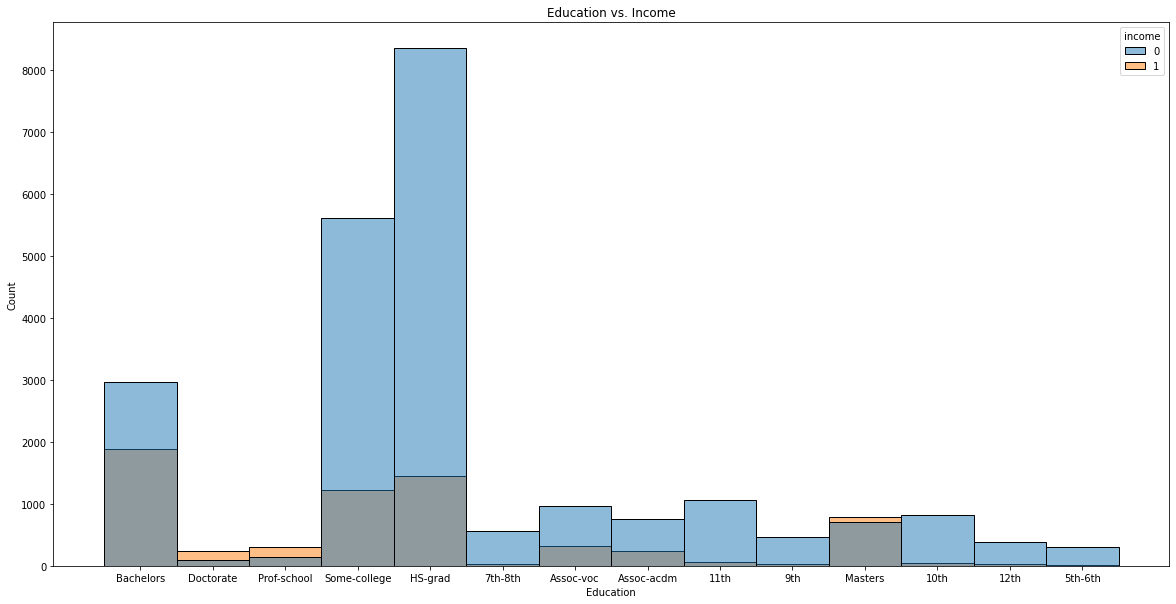

In [96]:
edu_hist = sns.histplot(data=df_2, x='education', hue='income')
edu_hist.figure.set_size_inches(20,10)
edu_hist.set_xlabel('Education')
edu_hist.set_title('Education vs. Income')

The features we will use for the algorithms are ['hours.per.week', 'capital.gain', 'education.num', 'capital.gain', 'age', 'sex', 'occupation', and 'marital.status']

## Encoding Categorical Values

In [97]:
# create a new categorical value list with the column names we will be using 
df_cat2 = ['marital.status', 'occupation']

# trim the data frame so we only have the necessary columns
df_3 = df_2.drop(columns=['workclass', 'education', 'relationship', 'race', 'capital.loss', 'native.country'])
df_3.head(5)

,age,fnlwgt,education.num,marital.status,occupation,sex,capital.gain,hours.per.week,income
1470,62,159908,13,Married-civ-spouse,Adm-clerical,1,0,38,0
1471,72,144515,16,Married-civ-spouse,Exec-managerial,0,0,40,0
1472,76,224680,15,Married-civ-spouse,?,0,0,20,0
1473,66,350498,10,Married-civ-spouse,Transport-moving,0,0,20,0
1474,33,262042,9,Divorced,Adm-clerical,1,0,40,0


In [98]:
# Let's see how many unique values we have in each categorical column
for col in df_cat2:
  print(col, ':', len(df_3[col].unique()), ' labels')

marital.status : 7  labels
occupation : 15  labels


In [99]:
print('Marital Status > 800:', [x for x in df_3['marital.status'].value_counts() >= 800]) # we will use the top 5 results
print('Occupation > 1000:', [x for x in df_3['occupation'].value_counts() >= 1000]) # we will use the top 10 results

Marital Status > 800: [True, True, True, True, True, False, False]
Occupation > 1000: [True, True, True, True, True, True, True, True, True, True, False, False, False, False, False]


In [100]:
def OneHot(df, variable, top_x_labels):
  for label in top_x_labels:
    df[variable+'_'+label] = np.where(df_3[variable]==label, 1, 0)

occ_top10 = [x for x in df_3['occupation'].value_counts().sort_values(ascending=False).head(10).index]
marital_top5 = [x for x in df_3['marital.status'].value_counts().sort_values(ascending=False).head(5).index]

In [101]:
OneHot(df_3, 'occupation', occ_top10)
OneHot(df_3, 'marital.status', marital_top5)

df_3 = df_3.drop(columns=['marital.status', 'occupation'])
df_3.head(5)

,age,fnlwgt,education.num,sex,capital.gain,hours.per.week,income,occupation_Craft-repair,occupation_Prof-specialty,occupation_Exec-managerial,occupation_Adm-clerical,occupation_Sales,occupation_Other-service,occupation_Machine-op-inspct,occupation_?,occupation_Transport-moving,occupation_Handlers-cleaners,marital.status_Married-civ-spouse,marital.status_Never-married,marital.status_Divorced,marital.status_Separated,marital.status_Widowed
1470,62,159908,13,1,0,38,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1471,72,144515,16,0,0,40,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1472,76,224680,15,0,0,20,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1473,66,350498,10,0,0,20,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1474,33,262042,9,1,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


## Data Preperation 

In [102]:
# Let's shuffle our data frame a bit before we split it 
df_3 = df_3.sample(frac=1)
df_3.head()

,age,fnlwgt,education.num,sex,capital.gain,hours.per.week,income,occupation_Craft-repair,occupation_Prof-specialty,occupation_Exec-managerial,occupation_Adm-clerical,occupation_Sales,occupation_Other-service,occupation_Machine-op-inspct,occupation_?,occupation_Transport-moving,occupation_Handlers-cleaners,marital.status_Married-civ-spouse,marital.status_Never-married,marital.status_Divorced,marital.status_Separated,marital.status_Widowed
9231,20,190457,9,1,0,30,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
8775,35,253860,9,1,0,20,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
15598,33,159929,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
22932,48,355890,13,0,0,55,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
18022,23,256628,4,0,0,32,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [103]:
# Let's split the data! 
df_3_features = df_3.drop(columns=['income']) # we can remove income because thats the value we are trying to predict
df_3_target = df_3.income

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_3_features, df_3_target, test_size=0.2, random_state=1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((23862, 21), (5966, 21), (23862,), (5966,))

In [104]:
df_3.income.value_counts() # we can see that our sample is incredibly imbalanced 

0    23174
1     6654
Name: income, dtype: int64

In [105]:
# Let's try to fix this imbalance
from sklearn.utils import resample
over_50k = df_3[df_3.income == 1]
under_50k = df_3[df_3.income == 0]

over_50k_resampled = resample(over_50k, replace = True, n_samples=len(under_50k), random_state=33)

In [106]:
df3_upsampled = pd.concat([under_50k, over_50k_resampled])

In [107]:
df3_upsampled.income.value_counts() # now we have completely balanced data

1    23174
0    23174
Name: income, dtype: int64

In [108]:
y_train = df3_upsampled.income
x_train = df3_upsampled.drop('income', axis=1)

In [109]:
# Just make sure our training data is proper
print(x_train)
print(y_train)

       age  fnlwgt  ...  marital.status_Separated  marital.status_Widowed
9231    20  190457  ...                         0                       0
8775    35  253860  ...                         0                       0
15598   33  159929  ...                         0                       0
18022   23  256628  ...                         0                       0
30042   56  133819  ...                         1                       0
...    ...     ...  ...                       ...                     ...
27533   54  153486  ...                         0                       0
2868    54   35557  ...                         0                       0
16749   62   71467  ...                         0                       0
4242    40  121772  ...                         0                       0
12837   50  199995  ...                         0                       0

[46348 rows x 21 columns]
9231     0
8775     0
15598    0
18022    0
30042    0
        ..
27533    1
2868    

## Apply Classifcation Models

We'll implement KNN, Naive Bayes, Random Forest, and Logistic Regression

In [110]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [111]:
k_fold = KFold(n_splits=15, random_state=10, shuffle=True)

### Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = make_pipeline(StandardScaler(), GaussianNB())

gnb_cross_val = cross_val_score(clf_gnb, x_train, y_train, cv=k_fold, scoring='accuracy')
print('GNB Cross Val Score',gnb_cross_val)
print('')
print('Naive Bayes Cross Val Mean', gnb_cross_val.mean())

GNB Cross Val Score [0.77928803 0.78608414 0.78996764 0.77572816 0.77249191 0.79288026
 0.78252427 0.79482201 0.78867314 0.7815534  0.79255663 0.77443366
 0.78576052 0.78957591 0.80252509]

Naive Bayes Cross Val Mean 0.7859243171737555


### K_Nearest_Neighbors

In [113]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = make_pipeline(KNeighborsClassifier(n_neighbors=50, weights='uniform'))

knn_cross_val = cross_val_score(clf_knn, x_train, y_train, cv=k_fold, scoring='accuracy')

print('KNN Cross Val Score',knn_cross_val)
print('')
print('KNN Cross Val Mean', knn_cross_val.mean())

KNN Cross Val Score [0.62912621 0.62135922 0.63139159 0.62330097 0.62880259 0.63042071
 0.63398058 0.62135922 0.62750809 0.62783172 0.6210356  0.61423948
 0.62718447 0.61379087 0.60893493]

KNN Cross Val Mean 0.6240177502869736


### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

clf_lr = make_pipeline( StandardScaler(), LogisticRegression())
clf_lr.fit(x_train, y_train)

lr_cross_val = cross_val_score(clf_lr, x_train, y_train, cv=k_fold, scoring='accuracy')
print('Logisitic Regression Cross Val Score',lr_cross_val)
print('')
print('Logistic Regression Cross Val Mean', lr_cross_val.mean())

Logisitic Regression Cross Val Score [0.80711974 0.81747573 0.82621359 0.80970874 0.8171521  0.81909385
 0.81294498 0.8197411  0.82038835 0.80938511 0.81585761 0.80097087
 0.80906149 0.81709291 0.831337  ]

Logistic Regression Cross Val Mean 0.8155695454134324


### Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=50, max_features=3)

rf_cross_val = cross_val_score(clf_rf, x_train, y_train, cv=k_fold, scoring='accuracy')
print('Random Forest Cross Val Score',rf_cross_val)
print('')
print('Random Forest Cross Val Mean', rf_cross_val.mean())

Random Forest Cross Val Score [0.93430421 0.93721683 0.93915858 0.9394822  0.94530744 0.93721683
 0.93786408 0.93754045 0.9433657  0.93754045 0.93527508 0.92912621
 0.93495146 0.94205244 0.94626093]

Random Forest Cross Val Mean 0.9384441923057179


We can see that our random forest model is by far the most accurate our of the ones we have tested, so we will fit and evaluate that model. 

## Evaluate Models

In [116]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

Random Forest F1 Score 0.9932075471698113

Random Forest Accuracy 0.9969829031176668



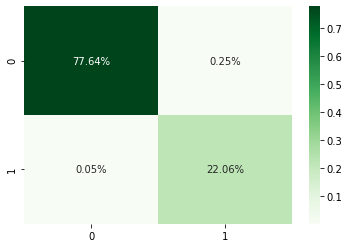

In [117]:
# Let's fit our random forest model
clf_rf.fit(x_train, y_train)

print('Random Forest F1 Score', f1_score(y_test, clf_rf.predict(x_test), average='binary')) # Let's look at the f1 score
print('')
print('Random Forest Accuracy', accuracy_score(y_test, clf_rf.predict(x_test), normalize=True)) # The accuracy of our model
print('')

# Prepare our confusion matrix
y_pred = clf_rf.predict(x_test)
rf_cf_matrix = confusion_matrix(y_pred, y_test)

sns.heatmap(rf_cf_matrix/np.sum(rf_cf_matrix), annot=True, fmt='.2%', cmap='Greens') # make the matrix more aesthetically pleasing 

## Acknowledgements:

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

https://stackoverflow.com/questions/47790854/how-to-perform-onehotencoding-in-sklearn-getting-value-error

https://towardsdatascience.com/what-is-the-c4-5-algorithm-and-how-does-it-work-2b971a9e7db0

https://www.youtube.com/watch?v=6WDFfaYtN6s